# Results visualizer

In [149]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [150]:
results = pickle.load(open("results.p", "rb"))

In [151]:
def classifaction_report_df(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    
    row = {}
    row_data = lines[-2].split('     ')
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1_score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
    
    df = pd.DataFrame.from_dict(report_data)
    return df

In [152]:
def fscore(res, row=3):
    """
    Extract the fscore from a list of classification reports.
    @param res: list of pandas.DataFrame classification report
    @param row: information to be displayed.
        0 = Negative
        1 = Neutral
        2 = Positive
        3 = Avg [Default]
    @return list of the values of the classification
    """
    return [x['f1_score'][row] for x in res]

def precision(res, row=3):
    return [x['precision'][row] for x in res]

def recall(res, row=3):
    return [x['recall'][row] for x in res]

In [153]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/3., 1.05*height,
                '%f' % height,
                ha='center', va='bottom')

In [154]:
def barplot(results_l, results_r, results_n, metric, dataset):
    N = len(results_l)
    linear = metric(results_l)
    rbf = metric(results_r)
    nb = metric(results_n)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.20       # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))

    rects1 = ax.bar(ind, linear, width, color='r')
    rects2 = ax.bar(ind + width, rbf, width, color='g')
    rects3 = ax.bar(ind + 2*width, nb, width, color='b')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_title('Scores by classifiers and processing strategies for {}'.format(dataset))
    ax.set_xticks(ind + width / 3)
    ax.set_xticklabels(list(map(lambda x: 'S{}'.format(str(x)), np.arange(1, N+1))))

    ax.legend((rects1[0], rects2[0], rects3[0]), ('Linear', 'RBF', 'NB'))

3 classifiers -> 3 datasets -> 16 strategies -> classification report (f1-score, accuracy, ...)

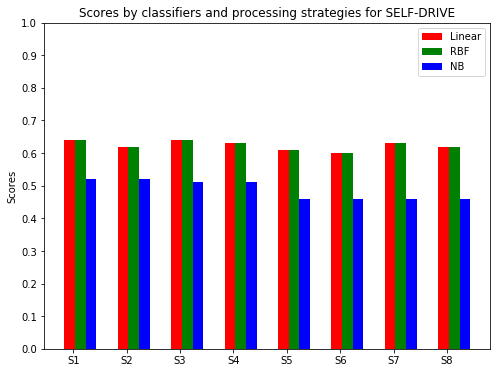

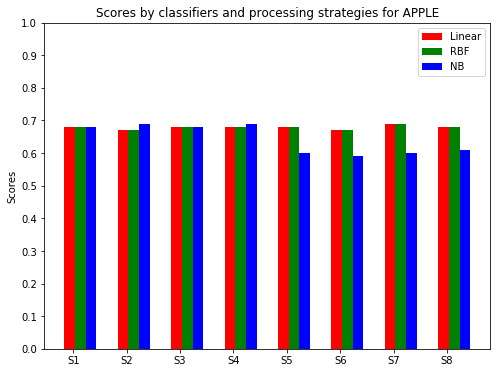

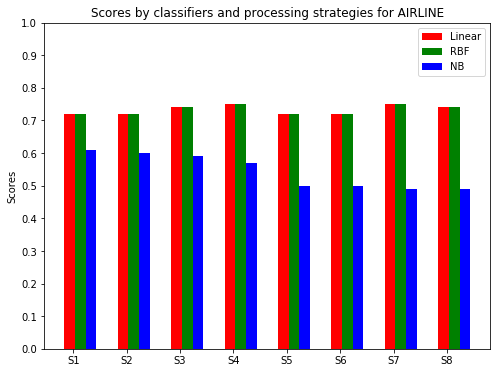

In [155]:
TITLES = ['SELF-DRIVE', 'APPLE', 'AIRLINE']

for i in range(len(results['linear'])):
    results_l = list(map(classifaction_report_df, results['linear'][i]))
    results_r = list(map(classifaction_report_df, results['rbf'][i]))
    results_n = list(map(classifaction_report_df, results['nb'][i]))
    barplot(results_l, results_r, results_n, fscore, TITLES[i])
plt.show()